In [1]:
!pip install torch torchvision mtcnn matplotlib Pillow numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
   

In [2]:
import os
import torch #torch.normal() and #torch.clamp()
import torchvision.transforms as transforms #resize()
from PIL import Image #to convert PIL to tensor
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [5]:
uploaded = files.upload() #file browser to upload
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json #Changes permissions to be read/write for the user only

Saving kaggle.json to kaggle.json


In [6]:
!kaggle datasets download -d badasstechie/celebahq-resized-256x256 -p /content/celeba-hq
!unzip -q /content/celeba-hq/celebahq-resized-256x256.zip -d /content/celeba-hq


Dataset URL: https://www.kaggle.com/datasets/badasstechie/celebahq-resized-256x256
License(s): GPL-2.0
 99% 280M/283M [00:02<00:00, 79.8MB/s]
100% 283M/283M [00:02<00:00, 111MB/s] 


In [7]:
#creating absolute paths to all images for easy access

data_dir = "/content/celeba-hq/celeba_hq_256"

image_paths = [
    os.path.join(data_dir, f)
    for f in os.listdir(data_dir)
    if f.lower().endswith('.jpg')
]

print(f"Found {len(image_paths)} images.")

Found 30000 images.


In [17]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()     #[3,128,128] from [256,256,3] and pixel value [0,1]
])

In [13]:
clean_images = [] #to store the converted images

#for i in range(len(image_paths)):
for i in range(5):
    if i < len(image_paths):
        img = Image.open(image_paths[i]).convert('RGB')
        img = transform(img)
        clean_images.append(img)


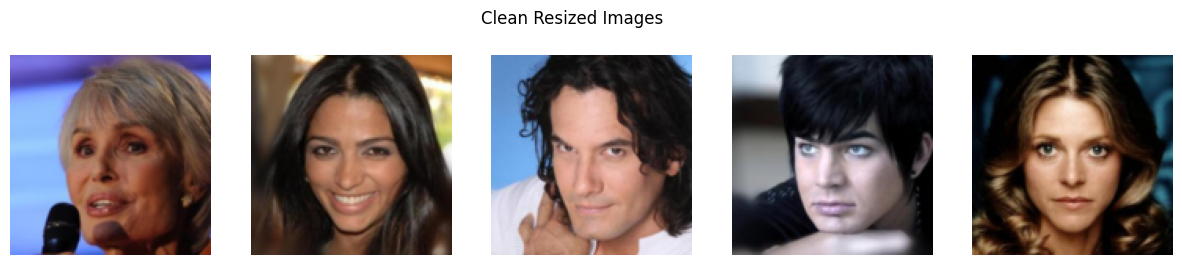

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle("Clean Resized Images")
for i, img in enumerate(clean_images):
    axes[i].imshow(img.permute(1, 2, 0).numpy())
    axes[i].axis('off')
plt.show()

In [18]:
#Adding gaussian noise to these 5 images

noisy_images = []
for i in range(5):
    if i < len(image_paths):
        img = clean_images[i]
        noise = torch.normal(0.0, 0.1, img.shape) #gaussian noise with mean=0, std dev=0.1
        noisy_img = torch.clamp(img + noise, 0.0, 1.0)
        noisy_images.append(noisy_img)

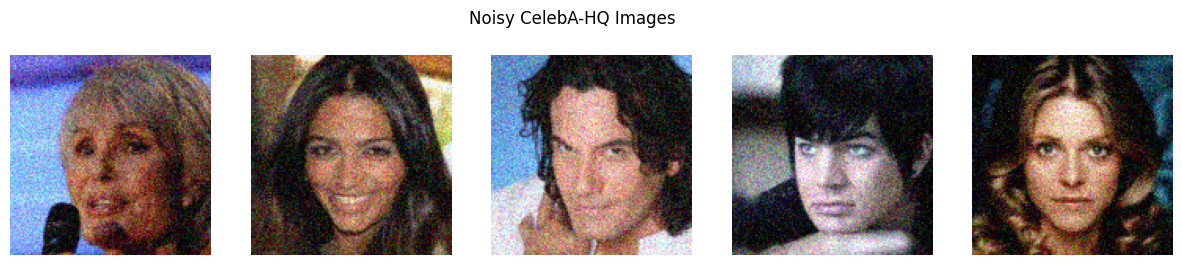

In [19]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle("Noisy CelebA-HQ Images")
for i, img in enumerate(noisy_images):
    axes[i].imshow(img.permute(1, 2, 0).numpy())
    axes[i].axis('off')
plt.show()